In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
print(sys.path.append('/home/lxmls2017/Desktop/workspace/lxmls-toolkit'))
from lxmls.readers import galton
galton_data = galton.load()

None


In [3]:
def f(x):
    return (x+2)**2 -16 * (np.exp(-(x-2)**2))
def df(x):
    return 2*x +4 + 32 * (np.exp(-(x-2)**2)) * (x-2)

def gradient_descent_step(x, eps=0.01):
    fval = f(x)
    dfval = df(x)
    return x - eps * dfval
    

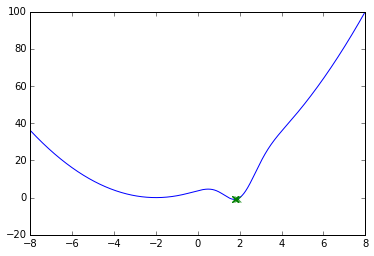

In [4]:
%matplotlib inline

curvex = np.linspace(-8,8,1000)
res = list()
x = 2
prec = 0.001
while True:
    xnew = gradient_descent_step(x)
    res.append(xnew)
    if np.abs(x - xnew) <  prec or xnew > 4:
        break
    x = xnew
plt.plot(curvex, f(curvex), 'b-')
plt.plot(res, [f(r) for r in res], 'gx') 
plt.show()

In [29]:
def _extend_x_bias(feature_x):
    x = np.ones((feature_x.shape[0], feature_x.shape[1]+1))
    x[:, :-1] = feature_x
    return x

def predict(w, feature_x):
    x = _extend_x_bias(feature_x)
    w_exp = np.tile(w, (x.shape[0],1))
    return np.multiply(w_exp, x).sum(axis=1)


def lost(w, feature_x, y):
    x = _extend_x_bias(feature_x)
    w_exp = np.tile(w, (x.shape[0],1))
    assert x.shape == w_exp.shape, '(%d,%d) vs (%d,%d)'%(x.shape[0], x.shape[1], w_exp.shape[0], w_exp.shape[1])
    return (np.multiply(w_exp, x).sum(axis=1)-y)**2

def dlost(w, feature_x, y):
    x = _extend_x_bias(feature_x)
    w_exp = np.tile(w, (x.shape[0],1))
    assert x.shape == w_exp.shape
    diff = 2*(np.multiply(w_exp, x).sum(axis=1) - y)
    firstpart = np.tile(diff, (2,1)).transpose()
    gradient = np.multiply(firstpart, x).sum(axis=0) / x.shape[0]
    return gradient

def gradient_descent_step(w, x, y, eps=0.0008):
    curr_lost = lost(w, x, y)
    gradient = dlost(w, x, y)
    print(gradient)
    return w - eps * gradient, curr_lost


def gradient_check(w, feature_x, y, h=0.01):
    delta = np.array([h / 2, 0])
    y_right = lost(w + delta, feature_x, y)
    y_left = lost(w - delta, feature_x, y)
    n_gradient = ((y_right - y_left) / h).sum() / feature_x.shape[0]
    gradient = dlost(w, feature_x, y)
    diff = 2 * (gradient[0] - n_gradient) / (gradient[0] + n_gradient)
    return diff

In [31]:
w=np.array([  0.64629058,  23.94153018])
step = 1
num_data = galton_data.shape[0]
feature_x, y = galton_data[:,0].reshape(num_data,1), galton_data[:,1]
while True:
    diff = gradient_check(w, feature_x, y, h=1)
    step += 1
    print(step, w, diff)
    w=np.random.rand(2)
    if step > 100:
        break

2 [  0.64629058  23.94153018] 3.4586335882e-08
3 [ 0.76161081  0.19435051] 6.50434177321e-15
4 [ 0.16649628  0.78938416] -2.3797942581e-15
5 [ 0.54051898  0.70869759] -6.99321673077e-15
6 [ 0.40784657  0.58123879] -1.84649071836e-15
7 [ 0.65241507  0.72713281] -4.67265087193e-15
8 [ 0.90089749  0.43211373] 9.40405100744e-15
9 [ 0.16965182  0.50395788] 1.54494077397e-15
10 [ 0.90485999  0.01631787] 1.33130346345e-15
11 [ 0.5715352   0.42839294] 1.51180259585e-15
12 [ 0.28122551  0.7270694 ] -4.56088031042e-15
13 [ 0.23931984  0.41245523] -1.4261677092e-15
14 [ 0.530181   0.7579522] 2.35313683874e-15
15 [ 0.95737967  0.6057174 ] -2.209618046e-15
16 [ 0.4664542   0.47292005] 7.44635930643e-16
17 [ 0.30294101  0.41217839] -6.09084334203e-15
18 [ 0.38459383  0.83216173] -1.29905843689e-15
19 [ 0.18696635  0.71143484] -1.21867746217e-15
20 [ 0.14603575  0.4686011 ] -9.46624769535e-15
21 [ 0.60875372  0.88580433] 3.1179788668e-15
22 [ 0.61755886  0.64897267] -1.84510918232e-15
23 [ 0.00898302

[ -1.86738155e-05  -2.73189648e-07]
1 [  0.64629059  23.94153018] 5.00029376555
[  1.20862885e-04   1.76816672e-06]
2 [  0.6462905   23.94153018] 5.00029376555
[ -7.82263114e-04  -1.14441422e-05]
3 [  0.64629112  23.94153019] 5.00029376558
[  5.06305621e-03   7.40701319e-05]
4 [  0.64628707  23.94153013] 5.00029376692
[-0.03276971 -0.00047941]
5 [  0.64631329  23.94153051] 5.00029382305
[ 0.21209603  0.00310287]
6 [  0.64614361  23.94152803] 5.00029617414
[-1.37275311 -0.02008273]
7 [  0.64724182  23.9415441 ] 5.00039466352
[ 8.8848957   0.12998185]
8 [  0.6401339   23.94144011] 5.0045204732
[-57.50587688  -0.84128395]
9 [  0.6861386   23.94211314] 5.17735439436
[ 372.19636426    5.44505786]
10 [  0.38838151  23.93775709] 12.4175245958
[-2408.97350125   -35.24214998]
11 [  2.31556031  23.96595081] 315.714841432
[ 15591.64432263    228.09842754]
12 [-10.15775515  23.78347207] 13021.1153832
[-100914.09164817   -1476.32572583]
13 [ 70.57351817  24.96453265] 545261.903431
[ 653148.16593093

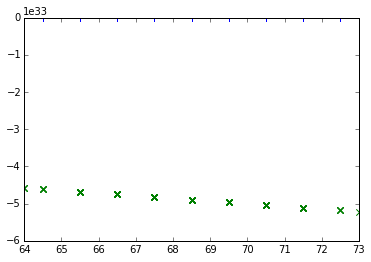

In [14]:
%matplotlib inline
w=np.random.rand(2)
w=np.array([  0.64629058,  23.94153018])
step = 1
num_data = galton_data.shape[0]
while True:
    w, lostv = gradient_descent_step(w, galton_data[:,0].reshape(num_data,1), galton_data[:,1]) 
    print(step, w, lostv.sum()/ num_data)
    step += 1
    if step > 50:
        break
plt.plot(galton_data[:,0], galton_data[:,1], 'b+')
pred = predict(w, galton_data[:,0].reshape(num_data,1))
plt.plot(galton_data[:,0], pred.reshape(num_data,), 'gx') 
plt.show()

In [55]:
np.linalg.lstsq(_extend_x_bias(galton_data[:,0].reshape(num_data,1)), galton_data[:,1])

(array([  0.64629058,  23.94153018]),
 array([ 4640.27261443]),
 2,
 array([  2.08181288e+03,   7.96301870e-01]))

In [53]:
np.linalg.lstsq?

In [71]:
galton_data

array([[ 70.5,  61.7],
       [ 68.5,  61.7],
       [ 65.5,  61.7],
       ..., 
       [ 69.5,  73.7],
       [ 69.5,  73.7],
       [ 69.5,  73.7]])